# Shape detection

In the last chapter we saw how to remove noise from an image with some filtering but there is another way.

If, instead of looking for all the noise to delete, we could grab what we need and remove everything that is outside of it.

First, try to select the text area on this plan:

<img src="./assets/text_plan.jpg" height="600" />

and draw a line around it like follows:

<img src="./assets/plan_txt_selected.jpg" height="600" />

This issue is a common one, and has been discussed in length [before](https://stackoverflow.com/questions/23506105/extracting-text-opencv/23565051). Try and pilfer the needed information to compose clean and human understandable code for this particular use case.

Now delete everything outside of those boxes (fill it with white pixels)

Now invert to colors so the white become black and the black become white

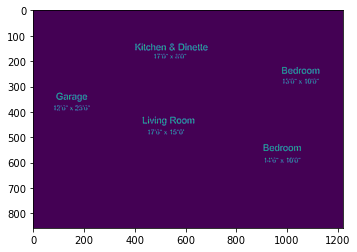

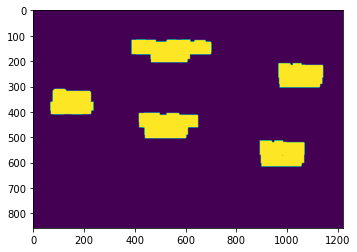

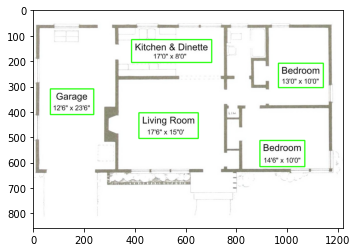

In [3]:
# Code here
import cv2
from matplotlib import pyplot as plt

# Load image, grayscale, Gaussian blur, adaptive threshold
image = cv2.imread('assets/text_plan.jpg')
#cv2.imshow('image', image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9,9), 0)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

# Dilate to combine adjacent text contours
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
dilate = cv2.dilate(thresh, kernel, iterations=4)

# Find contours, highlight text areas, and extract ROIs
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

ROI_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > 10000:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)
        # ROI = image[y:y+h, x:x+w]
        # cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
        # ROI_number += 1
plt.figure()
plt.imshow(thresh) 

plt.figure()
plt.imshow(dilate) 

plt.figure()
plt.imshow(image) 
#cv2.imshow('thresh', thresh)
#cv2.imshow('dilate', dilate)
#cv2.imshow('image', image)
#cv2.waitKey()


Congratulations! You are now a pro in image preprocessing with opencv.

Just joking, opencv is an endless library, there are even machine learning models in it!
Now that you have the basics down, you know where to search next time you will need to preprocess an image!

![pro photohop](https://media.giphy.com/media/t1HJXy5Q5NKA8/giphy.gif)

[Images source](https://stackoverflow.com/questions/37771263/detect-text-area-in-an-image-using-python-and-opencv)